In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv('Walmart_customer_purchases.csv')
data

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,80853da9-ef96-4c83-9191-bc872c3968a9,48,Male,Barbaramouth,Electronics,Laptop,2024-11-18,391.48,Debit Card,No,5,No
49996,97df1ed3-4041-474c-8ce8-958c816fc30a,51,Female,Troyshire,Beauty,Perfume,2024-11-19,272.09,Cash on Delivery,Yes,1,No
49997,948efe87-82a3-4a38-9dd6-30d44ad6f879,51,Male,South Rachel,Home,Curtains,2024-02-11,280.81,Debit Card,Yes,2,No
49998,9804d52f-35cd-4af3-a9e3-cbb8367396f0,33,Other,Courtneyville,Beauty,Shampoo,2024-08-31,140.74,Debit Card,No,2,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


In [4]:
data = data.drop(['Customer_ID','City','Purchase_Date'], axis = 1)

In [5]:
data

,Age,Gender,Category,Product_Name,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,49,Female,Electronics,Smartphone,253.26,Cash on Delivery,No,1,Yes
1,36,Other,Clothing,T-Shirt,73.19,Debit Card,Yes,1,No
2,52,Male,Beauty,Perfume,125.62,Credit Card,Yes,1,No
3,47,Female,Electronics,Smartwatch,450.32,Credit Card,No,2,Yes
4,43,Other,Electronics,Smartphone,369.28,Credit Card,Yes,2,Yes
...,...,...,...,...,...,...,...,...,...
49995,48,Male,Electronics,Laptop,391.48,Debit Card,No,5,No
49996,51,Female,Beauty,Perfume,272.09,Cash on Delivery,Yes,1,No
49997,51,Male,Home,Curtains,280.81,Debit Card,Yes,2,No
49998,33,Other,Beauty,Shampoo,140.74,Debit Card,No,2,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               50000 non-null  int64  
 1   Gender            50000 non-null  object 
 2   Category          50000 non-null  object 
 3   Product_Name      50000 non-null  object 
 4   Purchase_Amount   50000 non-null  float64
 5   Payment_Method    50000 non-null  object 
 6   Discount_Applied  50000 non-null  object 
 7   Rating            50000 non-null  int64  
 8   Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.4+ MB


In [7]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
data["Age"] = ord_enc.fit_transform(data[["Age"]]).astype('int')
data["Gender"] = ord_enc.fit_transform(data[["Gender"]]).astype('int')
data["Category"] = ord_enc.fit_transform(data[["Category"]]).astype('int')
data["Product_Name"] = ord_enc.fit_transform(data[["Product_Name"]]).astype('int')
data["Payment_Method"] = ord_enc.fit_transform(data[["Payment_Method"]]).astype('int')
data["Discount_Applied"] = ord_enc.fit_transform(data[["Discount_Applied"]]).astype('int')
data["Repeat_Customer"] = ord_enc.fit_transform(data[["Repeat_Customer"]]).astype('int')

In [8]:
data

,Age,Gender,Category,Product_Name,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,31,0,2,12,253.26,0,0,1,1
1,18,2,1,15,73.19,2,1,1,0
2,34,1,0,10,125.62,1,1,1,0
3,29,0,2,13,450.32,1,0,2,1
4,25,2,2,12,369.28,1,1,2,1
...,...,...,...,...,...,...,...,...,...
49995,30,1,2,8,391.48,2,0,5,0
49996,33,0,0,10,272.09,0,1,1,0
49997,33,1,3,1,280.81,2,1,2,0
49998,15,2,0,11,140.74,2,0,2,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               50000 non-null  int32  
 1   Gender            50000 non-null  int32  
 2   Category          50000 non-null  int32  
 3   Product_Name      50000 non-null  int32  
 4   Purchase_Amount   50000 non-null  float64
 5   Payment_Method    50000 non-null  int32  
 6   Discount_Applied  50000 non-null  int32  
 7   Rating            50000 non-null  int64  
 8   Repeat_Customer   50000 non-null  int32  
dtypes: float64(1), int32(7), int64(1)
memory usage: 2.1 MB


In [10]:
data = data.sample(frac = 1)
data

,Age,Gender,Category,Product_Name,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
14556,31,1,0,9,487.66,0,1,2,1
36191,26,0,2,12,396.18,3,1,5,1
34141,28,1,3,7,69.77,2,1,3,0
41098,28,0,3,14,410.63,2,0,3,0
17305,8,2,2,13,132.42,1,0,1,0
...,...,...,...,...,...,...,...,...,...
13551,22,2,0,9,279.75,3,0,1,1
39145,34,2,3,7,431.32,2,1,3,0
1460,42,1,0,10,379.83,0,0,2,0
25135,23,2,2,13,443.46,0,0,1,1


In [11]:
data.columns

Index(['Age', 'Gender', 'Category', 'Product_Name', 'Purchase_Amount',
       'Payment_Method', 'Discount_Applied', 'Rating', 'Repeat_Customer'],
      dtype='object')

In [12]:
# training and normalization of data
X = data[['Age', 'Gender', 'Category', 'Product_Name', 'Purchase_Amount',
       'Payment_Method', 'Rating', 'Repeat_Customer']]
Y = data['Discount_Applied']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8,test_size = 0.10, random_state=1)

In [25]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)

SVC()

In [27]:
Y_pred = svc.predict(X_test)
Y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [29]:
#test aucc
test_svc_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
test_svc_accuracy

49.02

In [31]:
#Train aucc
train_svc_accuracy= round(accuracy_score(Y_train,svc.predict(X_train)), 4)*100 # Accuracy
train_svc_accuracy

50.23

In [33]:
#to dump model
import pickle as pk
filename = 'model.pickle'
pk.dump(svc, open(filename, 'wb'))

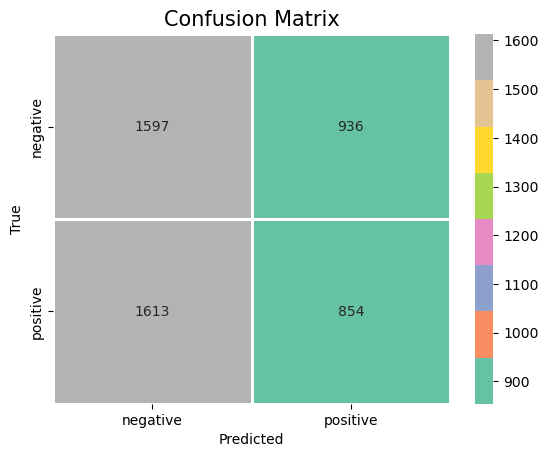

In [35]:
# def impressions(model,accuracy):
# print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
cm=confusion_matrix(Y_test,Y_pred)
class_label = ['negative', 'positive']
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [37]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[1597,  936],
       [1613,  854]], dtype=int64)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
ytest = np.array(Y_test)
print(classification_report(ytest,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.63      0.56      2533
           1       0.48      0.35      0.40      2467

    accuracy                           0.49      5000
   macro avg       0.49      0.49      0.48      5000
weighted avg       0.49      0.49      0.48      5000



In [41]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X_train,Y_train)
Y_pred = log_regression.predict(X_test)
lg_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
lg_accuracy

49.66

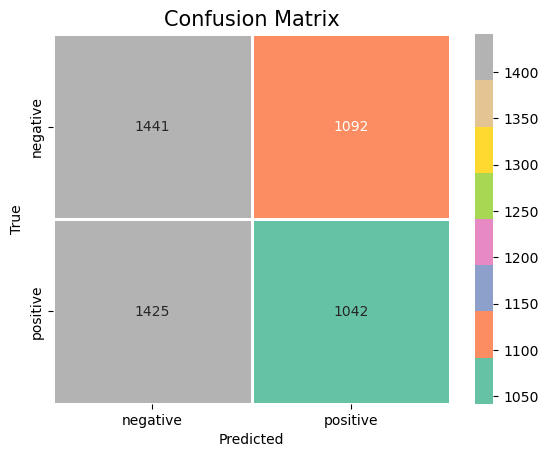

In [43]:
# def impressions(model,accuracy):
# print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
cm=confusion_matrix(Y_test,Y_pred)
class_label = ['negative', 'positive']
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [45]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import mean_squared_error,r2_score

test_accuracy = []
test_mse_value = []
train_accuracy = []
train_mse_value = []

for i in range(1,50):
  KNN= KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train,Y_train)
  test_pred = KNN.predict(X_test)
  train_pred = KNN.predict(X_train)

  test_acc= round(accuracy_score(Y_test,test_pred), 5)*100 # Accuracy
  train_acc= round(accuracy_score(Y_train,train_pred), 5)*100 # Accuracy

  mse1 = round(mean_squared_error(Y_test,test_pred),3)
  mse2 = round(mean_squared_error(Y_train,train_pred),3)

  test_accuracy.append(test_acc)
  train_accuracy.append(train_acc)

  test_mse_value.append(mse1)
  train_mse_value.append(mse2)

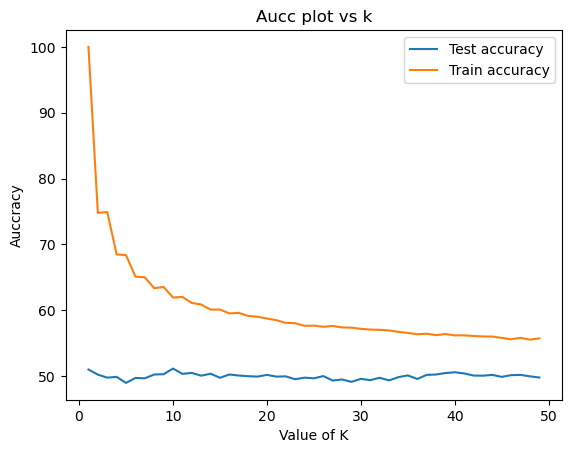

In [47]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = test_accuracy
y1 = train_accuracy
plt.plot(x,y,label = 'Test accuracy')
plt.plot(x,y1,label = 'Train accuracy')
plt.title('Aucc plot vs k')
plt.xlabel('Value of K')
plt.ylabel('Auccracy')
plt.legend()
plt.show()

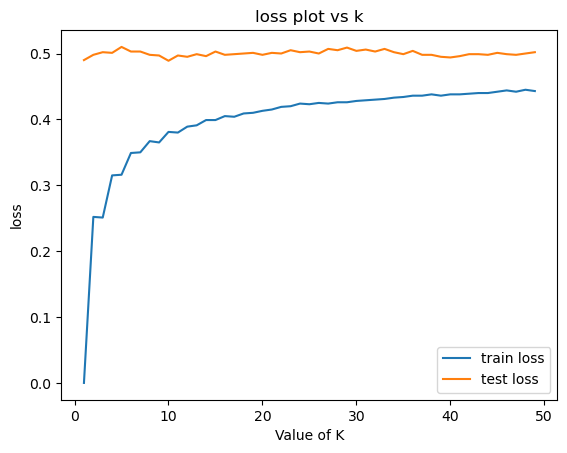

In [49]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = train_mse_value
y1 = test_mse_value
plt.plot(x,y,label = 'train loss')
plt.plot(x,y1,label = 'test loss')

plt.title('loss plot vs k')
plt.xlabel('Value of K')
plt.ylabel('loss')
plt.legend()
plt.show()

In [51]:
# test accu
KNN = KNeighborsClassifier(n_neighbors=15)
KNN.fit(X_train,Y_train)
Y_pred= KNN.predict(X_test)

KNN_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy
print(KNN_accuracy)

49.74


In [53]:
#train accu
Y_pred_train= KNN.predict(X_train)
KNN_accuracy= round(accuracy_score(Y_train,Y_pred_train), 5)*100 # Accuracy
print(KNN_accuracy)

60.108


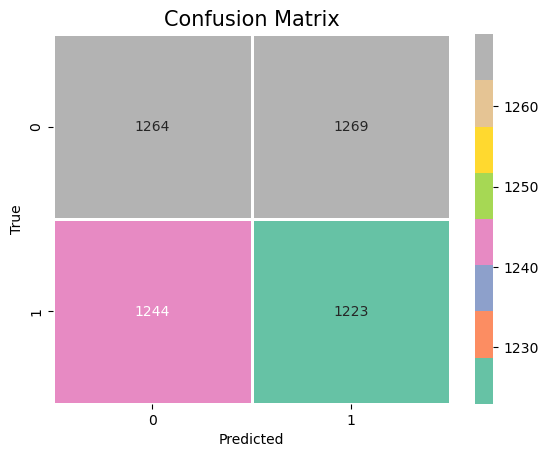

In [55]:
cm=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
# df_cm
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()